In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , GRU  , SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint , ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Ali_Baba_Stock_Data.csv" )
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2617 non-null   datetime64[ns]
 1   Adj Close  2617 non-null   float64       
 2   Close      2617 non-null   float64       
 3   High       2617 non-null   float64       
 4   Low        2617 non-null   float64       
 5   Open       2617 non-null   float64       
 6   Volume     2617 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 143.2 KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [7]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,2617,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,2019-11-30 14:35:26.709973248,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
min,2014-09-19 00:00:00,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,2017-04-26 00:00:00,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,2019-11-29 00:00:00,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,2022-07-07 00:00:00,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,2025-02-13 00:00:00,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08
std,NaN,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07


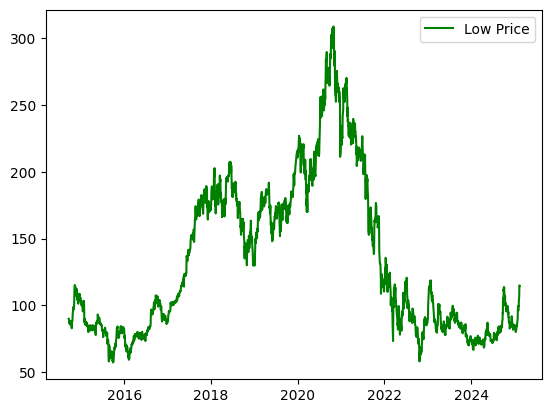

In [10]:
plt.plot(data['Date'], data['Low'] , label = 'Low Price' , c="green")
plt.legend()
plt.show()

In [11]:
X = data[["Close","High","Open","Volume"]].values
Y = data['Low'].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [13]:
x_scale = scaler_x.fit_transform(X)
y_scale = scaler_y.fit_transform(Y.reshape(-1, 1))

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x_scale , y_scale , test_size = 0.2 , shuffle=False)
print(f"len x_train : {len(x_train)} , len y_train : {len(y_train)}")
print(f"len x_test: {len(x_test)} , len y_test : {len(y_test)}")

len x_train : 2093 , len y_train : 2093
len x_test: 524 , len y_test : 524


In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [16]:
def create_dataset(X , Y, time_step=30):
    dataX = []
    dataY = []
    for i in range(len(X)-time_step):
        d = i + time_step
        dataX.append(X[i:d])
        dataY.append(Y[d])
    return np.array(dataX), np.array(dataY)

In [17]:
time_steps = 30
x_train , y_train = create_dataset(x_train, y_train, time_steps)
x_test , y_test = create_dataset(x_test, y_test, time_steps)

In [18]:
print(f"type of XT  is {type(x_train)}")
print(f"type of YT  is {type(y_train)}")
print(f"type of XT  is {type(x_test)}")
print(f"type of YT  is {type(y_test)}")

type of XT  is <class 'numpy.ndarray'>
type of YT  is <class 'numpy.ndarray'>
type of XT  is <class 'numpy.ndarray'>
type of YT  is <class 'numpy.ndarray'>


In [19]:
x_train.shape

(2063, 30, 4)

In [20]:
y_train.shape

(2063, 1)

In [21]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

In [22]:
print(f"shape of XT is {x_train.shape}")
print(f"shape of YT is {y_train.shape}")
print(f"shape of xt is {x_test.shape}")
print(f"shape of yt is {y_test.shape}")

shape of XT is (2063, 30, 4)
shape of YT is (2063, 1)
shape of xt is (494, 30, 4)
shape of yt is (494, 1)


RNN

In [23]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50,activation="relu" , return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model_rnn.add(SimpleRNN(50,activation="relu"))
model_rnn.add(Dense(1))

In [24]:
early_stopping2 = EarlyStopping(monitor="val_loss" , mode="min" , patience=30)
rrop2 = ReduceLROnPlateau(monitor="val_loss" , mode="min" , factor=0.5 , learning_rate=1e-6 , patience=20)
check_point2 = ModelCheckpoint("alibaba_model_RNN_LOW.h5", monitor="val_loss" , save_best_only=True)

In [25]:
model_rnn.compile(optimizer="adam", loss='mean_absolute_error')
model_rnn.fit(x_train, y_train,validation_data=(x_test,y_test) ,  epochs=100, batch_size=32 , callbacks=[early_stopping2 , rrop2 , check_point2])

Epoch 1/100
65/65 [==============================] - 2s 11ms/step - loss: 0.0791 - val_loss: 0.0101 - lr: 0.0010
Epoch 2/100
22/65 [=========>....................] - ETA: 0s - loss: 0.0170

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


65/65 [==============================] - 0s 6ms/step - loss: 0.0169 - val_loss: 0.0115 - lr: 0.0010
Epoch 3/100
65/65 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0082 - lr: 0.0010
Epoch 4/100
65/65 [==============================] - 0s 7ms/step - loss: 0.0147 - val_loss: 0.0075 - lr: 0.0010
Epoch 5/100
65/65 [==============================] - 1s 9ms/step - loss: 0.0156 - val_loss: 0.0079 - lr: 0.0010
Epoch 6/100
65/65 [==============================] - 1s 10ms/step - loss: 0.0137 - val_loss: 0.0072 - lr: 0.0010
Epoch 7/100
65/65 [==============================] - 1s 9ms/step - loss: 0.0144 - val_loss: 0.0072 - lr: 0.0010
Epoch 8/100
65/65 [==============================] - 1s 9ms/step - loss: 0.0124 - val_loss: 0.0062 - lr: 0.0010
Epoch 9/100
65/65 [==============================] - 1s 8ms/step - loss: 0.0124 - val_loss: 0.0080 - lr: 0.0010
Epoch 10/100
65/65 [==============================] - 1s 8ms/step - loss: 0.0113 - val_loss: 0.0061 - lr: 0.0010
Ep

In [26]:
model_rnn = load_model("alibaba_model_RNN_LOW.h5")
model_rnn.evaluate(x_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0053


0.00527995778247714

16/16 [==============================] - 0s 1ms/step


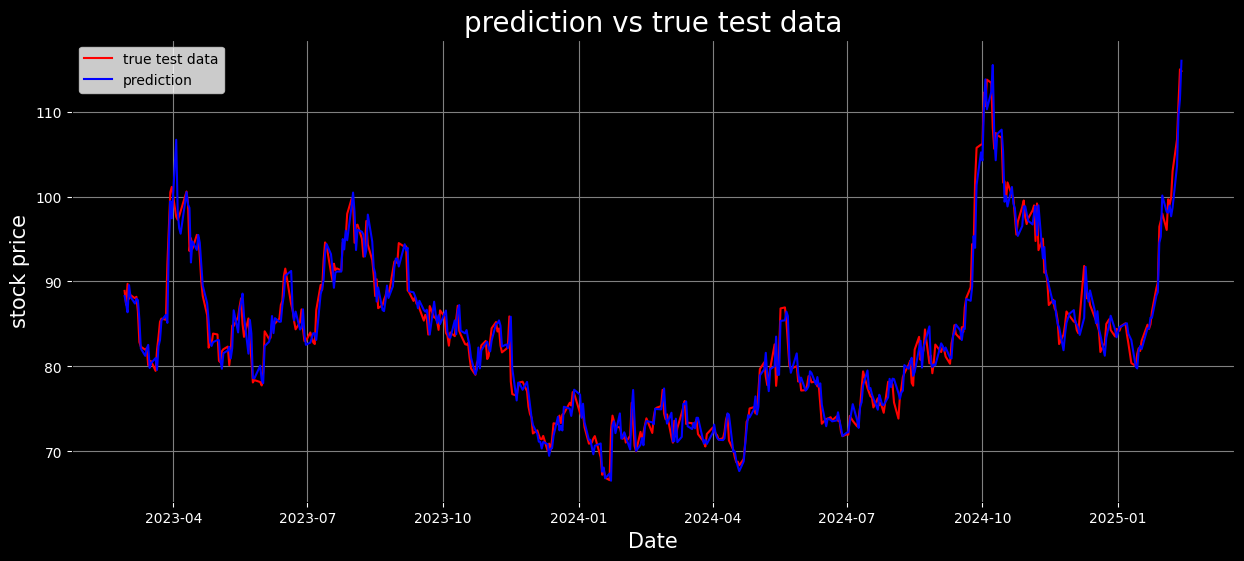

In [27]:
y_pred_rnn = model_rnn.predict(x_test)
date_for_pred = data['Date'][-len(y_pred_rnn):]
pred_rescale_rnn = scaler_y.inverse_transform(y_pred_rnn)
y_test_rescale = scaler_y.inverse_transform(y_test)

plt.figure(figsize=(15, 6) , facecolor="black")
plt.title("prediction vs true test data" , color="white" , fontsize=20)
plt.plot(date_for_pred , y_test_rescale,color = "red" , label='true test data')
plt.plot(date_for_pred , pred_rescale_rnn,color="blue" , label='prediction')

ax = plt.gca()
ax.set_facecolor("black")

plt.xlabel("Date" , color="white" , fontsize=15)
plt.xlabel("Date" , color="white" , fontsize=15)
plt.ylabel("stock price" , color="white" , fontsize=15)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()


GRU , LSTM

In [28]:
model_lstm_gru = Sequential()
model_lstm_gru.add(GRU(units = 50, return_sequences = True, activation = 'relu' , input_shape=(x_train.shape[1],x_train.shape[2])))
model_lstm_gru.add(LSTM(units = 50, activation = 'relu'))
model_lstm_gru.add(Dense(1))

In [29]:
early_stopping = EarlyStopping(monitor="val_loss" , mode="min" , patience=17)
rrop = ReduceLROnPlateau(monitor="val_loss" , mode="min" , factor=0.5 , learning_rate=1e-6 , patience=8)
check_point = ModelCheckpoint("alibaba_model_LSTM_GRU_LOW.h5", monitor="val_loss" , save_best_only=True)

In [30]:
model_lstm_gru.compile(loss='mean_absolute_error', optimizer='adam')
history = model_lstm_gru.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs = 100 , batch_size=10 , callbacks=[early_stopping , rrop , check_point])

Epoch 1/100
207/207 [==============================] - 4s 12ms/step - loss: 0.0364 - val_loss: 0.0108 - lr: 0.0010
Epoch 2/100
 14/207 [=>............................] - ETA: 1s - loss: 0.0223

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


207/207 [==============================] - 2s 11ms/step - loss: 0.0201 - val_loss: 0.0094 - lr: 0.0010
Epoch 3/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0174 - val_loss: 0.0083 - lr: 0.0010
Epoch 4/100
207/207 [==============================] - 2s 10ms/step - loss: 0.0166 - val_loss: 0.0090 - lr: 0.0010
Epoch 5/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0147 - val_loss: 0.0074 - lr: 0.0010
Epoch 6/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0137 - val_loss: 0.0065 - lr: 0.0010
Epoch 7/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0132 - val_loss: 0.0077 - lr: 0.0010
Epoch 8/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0125 - val_loss: 0.0063 - lr: 0.0010
Epoch 9/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0124 - val_loss: 0.0079 - lr: 0.0010
Epoch 10/100
207/207 [==============================] - 2s 11ms/step - loss: 0.0115 - val_lo

In [31]:
model_lstm_gru = load_model("alibaba_model_LSTM_GRU_LOW.h5")
model_lstm_gru.evaluate(x_test,y_test)

16/16 [==============================] - 0s 5ms/step - loss: 0.0052


0.005159065127372742

16/16 [==============================] - 0s 5ms/step


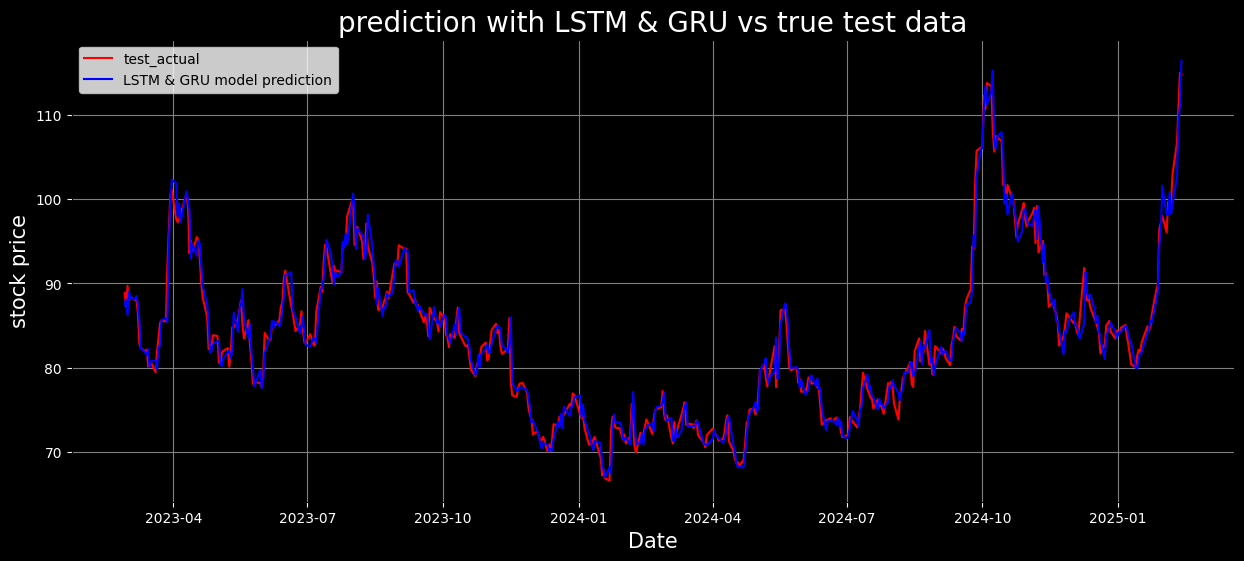

In [32]:
pred_lstm_gru = model_lstm_gru.predict(x_test)
date_for_pred = data['Date'][-len(pred_lstm_gru):]
pred_rescale_lstm_gru = scaler_y.inverse_transform(pred_lstm_gru)

plt.figure(figsize=(15, 6) , facecolor="black")
plt.title("prediction with LSTM & GRU vs true test data" , color="white" , fontsize=20)
plt.plot(date_for_pred,y_test_rescale,color="red" , label='test_actual')
plt.plot(date_for_pred , pred_rescale_lstm_gru,color="blue" ,label='LSTM & GRU model prediction')

ax = plt.gca()
ax.set_facecolor("black")
plt.xlabel("Date" , color="white" , fontsize=15)
plt.ylabel("stock price" , color="white" , fontsize=15)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()

plot all model

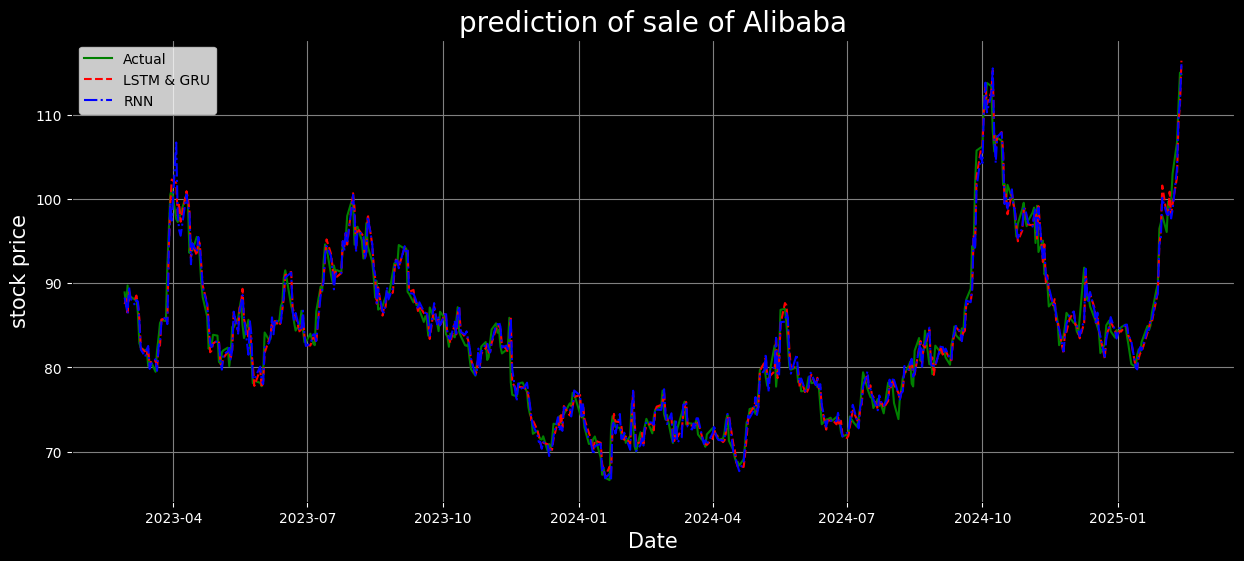

In [33]:
date_for_pred = data['Date'][-len(pred_lstm_gru):]
plt.figure(figsize=(15, 6) , facecolor="black")
plt.title("prediction of sale of Alibaba" , color="white" , fontsize=20)

plt.plot(date_for_pred,y_test_rescale ,color="green" ,label = 'Actual' , linestyle="-")
plt.plot(date_for_pred,pred_rescale_lstm_gru ,color="red" , label = 'LSTM & GRU' , linestyle="dashed")
plt.plot(date_for_pred,pred_rescale_rnn ,color="blue", label = 'RNN' , linestyle="dashdot")

ax = plt.gca()
ax.set_facecolor("black")
plt.xlabel("Date" , color="white" , fontsize=15)
plt.ylabel("stock price" , color="white" , fontsize=15)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()
plt.show()


In [34]:
print(f'mean_absolute_error(true , prediction) : {mean_absolute_error(y_test_rescale,  pred_rescale_rnn)}')
print(f'mean_squared_error(true , prediction) : {mean_squared_error(y_test_rescale,pred_rescale_rnn)}')


mean_absolute_error(true , prediction) : 1.3290183184033006
mean_squared_error(true , prediction) : 3.3619946601528143


In [35]:
XTprediction = model_rnn.predict(x_train)
xtprediction = model_rnn.predict(x_test)
pred_rnn = np.concatenate([XTprediction, xtprediction], axis=0)

16/16 [==============================] - 0s 2ms/step


In [36]:
XTprediction = model_lstm_gru.predict(x_train)
xtprediction = model_lstm_gru.predict(x_test)
pred_lstm = np.concatenate([XTprediction, xtprediction], axis=0)

16/16 [==============================] - 0s 4ms/step


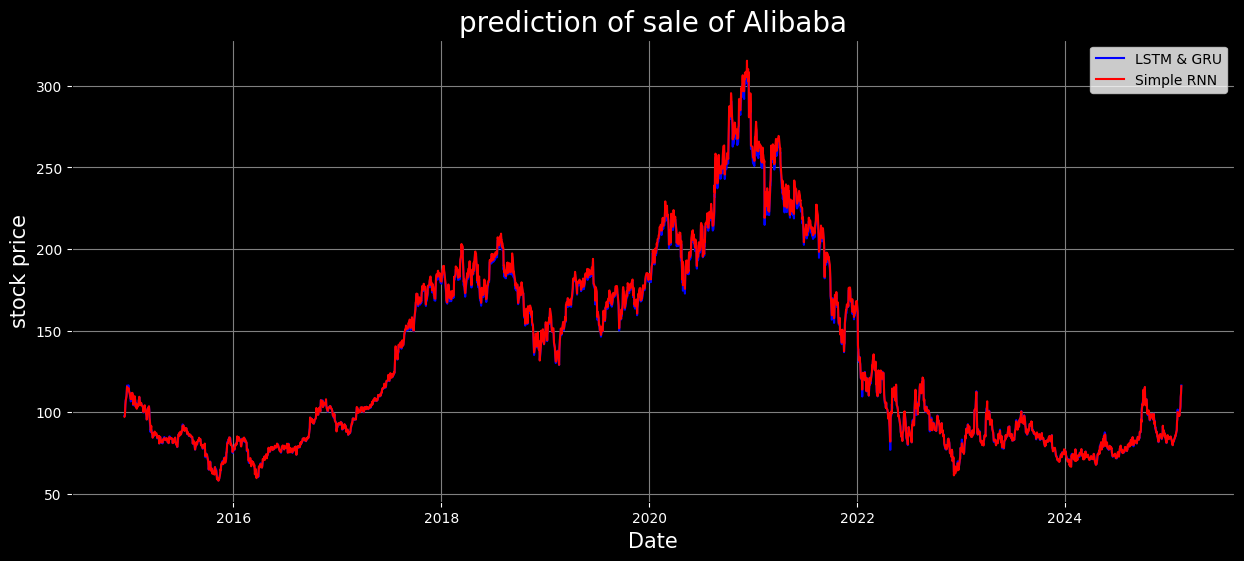

In [37]:
date_for_pred = data['Date'][-len(pred_lstm):]
pred_rescale_rnn = scaler_y.inverse_transform(pred_rnn)
pred_rescale_lstm = scaler_y.inverse_transform(pred_lstm)


plt.figure(figsize=(15, 6) , facecolor="black")
plt.title("prediction of sale of Alibaba" , color="white" , fontsize=20)

plt.plot(date_for_pred , pred_rescale_lstm,color="blue" , label='LSTM & GRU')
plt.plot(date_for_pred , pred_rescale_rnn,color="red" , label='Simple RNN')

ax = plt.gca()
ax.set_facecolor("black")
plt.xlabel("Date" , color="white" , fontsize=15)
plt.ylabel("stock price" , color="white" , fontsize=15)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()
plt.show()